In [1]:
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df.shape

(541909, 8)

In [5]:
# Monthly Revenue = Count of monthly invoice * quantity * unit price
# year/month/day = 20240715
# year * 100 + Month = 202400 + 07 = 202407
# year * 10000 + Month * 100 + day = 20240000 + 700 + 15 = 20240715

df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100 * date.year + date.month)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df_revenue = df.groupby(["InvoiceYearMonth"]).agg({'Revenue': sum}).reset_index()
df_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYearMonth,Revenue
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,201099.713989,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,201012.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,201103.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,201107.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,201110.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,201112.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,25.788703,378.810824


In [ ]:
df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


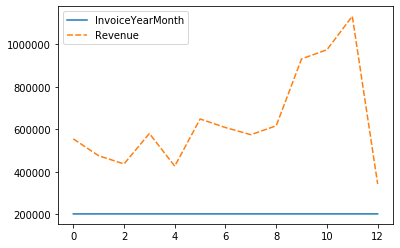

In [ ]:
sns.lineplot(data = df_revenue)

<ipython-input-7-fd490be86934>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  reveune_plot.set_xticklabels(reveune_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '201012'),
 Text(1, 0, '201101'),
 Text(2, 0, '201102'),
 Text(3, 0, '201103'),
 Text(4, 0, '201104'),
 Text(5, 0, '201105'),
 Text(6, 0, '201106'),
 Text(7, 0, '201107'),
 Text(8, 0, '201108'),
 Text(9, 0, '201109'),
 Text(10, 0, '201110'),
 Text(11, 0, '201111'),
 Text(12, 0, '201112')]

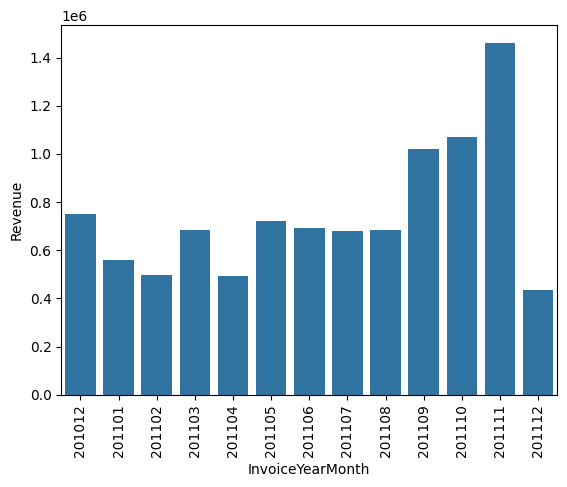

In [7]:
reveune_plot = sns.barplot(data=df_revenue, x = 'InvoiceYearMonth', y = 'Revenue')
# Assignment: Rotate x labels by 45/90 degrees
reveune_plot.set_xticklabels(reveune_plot.get_xticklabels(), rotation=90)

In [8]:
# Missing Values?
df.isnull().sum()

InvoiceNo                0
StockCode                0
Description           1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
InvoiceYearMonth         0
Revenue                  0
dtype: int64

In [9]:
df.isna().sum()

InvoiceNo                0
StockCode                0
Description           1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
InvoiceYearMonth         0
Revenue                  0
dtype: int64

In [10]:
# Strategy to drop rows with missing values: Drop the rows if unneccessary and number of missing values are more

# Impute if the column is important

"""
from sklearn.impute import SimpleImputer

imputed = SimpleImputer(missing_values = np.nan, strategy = 'mean/median/most_frequent/constant')

"""
"""
df.fillna()

"""

#drop rows with missing values

df.dropna(inplace=True)

# df.dropna(how='all',inplace=True)


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
InvoiceYearMonth    0
Revenue             0
dtype: int64

In [12]:
df.shape

(406829, 10)

In [ ]:
df.loc(df['Quantity'])

In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYearMonth,Revenue
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,201101.006123,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,201012.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,201104.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,201107.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,201110.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,201112.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,23.877089,427.591718


In [ ]:
# Fetching the Month and Day

df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
df['Day'] = df['InvoiceDate'].dt.day_name()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,201112,10.20,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,201112,12.60,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,201112,16.60,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,201112,16.60,12,Friday


In [ ]:
df.loc[df['Revenue'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,201012,-27.50,12,Wednesday
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,201012,-4.65,12,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,201012,-19.80,12,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,201012,-6.96,12,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,201012,-6.96,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,201112,-9.13,12,Friday
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,201112,-224.69,12,Friday
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,201112,-54.75,12,Friday
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,201112,-1.25,12,Friday


In [16]:
# Outliers

# IQR Method

"""
outlier = []

Q1 =
Q3 =

IQR = Q3 - Q1

LL = Q1  - 1.5 * IQR
UL = Q3  + 1.5 * IQR

for i in range(len(x)):

     if i < LL or i > UL:

         outlier.append(i)

"""

def get_ouliers(series):
  outliers = []
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)

  IQR = Q3 - Q1
  LL = Q1 - 1.5 * IQR
  UL = Q3 + 1.5 * IQR


  for value in series:
    if value > 0 and value < LL or value > UL:
      outliers.append(value)
  print(len(outliers))
  return outliers

print(get_ouliers(df['Revenue']))
# Z Score Method

"""
mean = np.mean(data)
std = np.std(data)

outlier = []

for i in range(len(data)):

    z = (i - mean)/std

    if z > 3 or z < 3:

        outlier.append(i)


"""



31241
[54.08, 90.0, 90.0, 45.0, 53.1, 70.80000000000001, 46.8, 46.8, 46.8, 70.80000000000001, 45.0, 54.0, 204.0, 350.4, 165.60000000000002, 163.2, 45.0, 50.4, 60.0, 97.75, 67.5, 92.5, 71.4, 67.8, 58.0, 102.0, 87.6, 178.20000000000002, 165.0, 165.0, 733.4399999999999, 647.04, 647.04, 626.4, 540.0, 51.0, 45.0, 68.0, 92.16, 102.0, 163.2, 72.0, 72.5, 51.0, 61.44, 61.44, 46.08, 198.0, 102.0, 81.36, 90.0, 71.03999999999999, 120.0, 165.0, 165.0, 79.6, 177.60000000000002, 177.60000000000002, 177.60000000000002, 177.60000000000002, 59.400000000000006, 45.0, 60.0, 81.6, 54.08, 100.80000000000001, 100.80000000000001, 71.5, 55.800000000000004, 223.20000000000002, 51.0, 44.550000000000004, 44.550000000000004, 102.0, 102.0, 153.0, 177.60000000000002, 326.4, 71.5, 90.0, 79.2, 212.0, 244.08, 144.0, 60.0, 122.04, 60.0, 60.0, 88.80000000000001, 81.36, 1627.2, 100.80000000000001, 69.12, 103.67999999999999, 103.67999999999999, 175.2, 49.5, 76.32000000000001, 79.2, 75.60000000000001, 51.0, 75.6000000000000

'\nmean = np.mean(data)\nstd = np.std(data)\n\noutlier = []\n\nfor i in range(len(data)):\n\n    z = (i - mean)/std\n\n    if z > 3 or z < 3:\n\n        outlier.append(i)\n\n\n'

In [17]:
def get_z_outliers(series):
  outliers = []

  mean = np.mean(series)
  std = np.std(series)

  for value in series:
    z = (value - mean)/std
    # print(z)
    # print(value)
    # print(mean)

    if value > 0 and (z > 3 or z < 3):
      outliers.append(value)

  print(len(outliers))
  return outliers

print(get_z_outliers(df['Revenue']))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Duplicate rows/data

# The process of removing duplicates is called as deduplication/deduping

duplicate_rows = df.duplicated()

if True in duplicate_rows:
    df = df[~duplicate_rows]

"""

Can use df.drop_duplicates() as well

"""


'\n\nCan use df.drop_duplicates() as well\n\n'

In [ ]:
df.shape

(401604, 12)

In [ ]:
# EDA

# MOnthly Revenue Growth Rate
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()
df_revenue

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,554604.020,NaN
1,201101,475074.380,-0.143399
2,201102,436546.150,-0.081099
3,201103,579964.610,0.328530
4,201104,426047.851,-0.265390
5,201105,648251.080,0.521545
6,201106,608013.160,-0.062072
7,201107,574238.481,-0.055549
8,201108,616368.000,0.073366
9,201109,931440.372,0.511176


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
df['Country'].nunique()

37

In [ ]:
df_USA = df[df['Country'] == 'USA']
df_USA

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Month,Day
164464,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,2011-04-19 16:19:00,3.95,12733.0,USA,201104,27.65,4,Tuesday
164465,550644,22979,PANTRY WASHING UP BRUSH,2,2011-04-19 16:19:00,1.45,12733.0,USA,201104,2.90,4,Tuesday
164466,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,2011-04-19 16:19:00,1.45,12733.0,USA,201104,4.35,4,Tuesday
164467,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-04-19 16:19:00,4.95,12733.0,USA,201104,4.95,4,Tuesday
164468,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,2011-04-19 16:19:00,1.25,12733.0,USA,201104,1.25,4,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
536922,C581229,23158,SET OF 5 LUCKY CAT MAGNETS,-36,2011-12-08 10:14:00,2.08,12558.0,USA,201112,-74.88,12,Thursday
536923,C581229,22712,CARD DOLLY GIRL,-12,2011-12-08 10:14:00,0.42,12558.0,USA,201112,-5.04,12,Thursday
536924,C581229,22027,TEA PARTY BIRTHDAY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,201112,-5.04,12,Thursday
536925,C581229,21508,VINTAGE KID DOLLY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,201112,-5.04,12,Thursday


In [ ]:
df_USA['Revenue'].sum()

1730.92

In [ ]:
# Approach

"""
Analysis: Univariate, Bivariate & Multivariate

Univariate = description(5 point summary), distribution(distplot/histogram), range, IQR, O/L

                > If Categorical variables: Encoding, Count categories, Barplot, Piechart,

                Time series analysis - Trend, line, pct change etc


Bivariate/Multivariate: Scatterplot, correlation matrix, heatmap, filters, groupby, aggregate,
                        relationship using plotting etc




"""

'\nAnalysis: Univariate, Bivariate & Multivariate\n\nUnivariate = description(5 point summary), distribution(distplot/histogram), range, IQR, O/L\n\n                > If Categorical variables: Encoding, Count categories, Barplot, Piechart, \n                \n                Time series analysis - Trend, line, pct change etc\n                \n                \nBivariate/Multivariate: Scatterplot, correlation matrix, heatmap, filters, groupby, aggregate,\n                        relationship using plotting etc\n\n\n\n\n'

In [ ]:
# General Flow of EDA

"""
A. If data is in the form of CSV, Excel, JSON - use pandas function pd.read_x() # where x = the file format

B. If data in external DB:

    import sqlalchemy
    engine = sqlalchemy.create_engine('connection string of the db')
    query = 'select * from table'

    df = pd.read_sql(query, engine)


C. Azure (Blob storage - CSV)

    from azure.storage.blob import BlobServiceClient
    connection_string =
    container_client =

    blob_client =

    pd.read_csv(blob_client......)


D. AWS S3 (Boto3 is the client of AWS used for Python)


    import boto3
    s3 = boto3.client()
    response = s3.get_object(bucket = ' name of the bucket', key = '')
    df = pd.read_csv(response)

E. If data is in MongoDB:

    import pymongo
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    # Database Name
    db = client["database"]
    # Collection Name
    col = db["database collection name"]

    x = col.find()

    for data in x:
        print(data)

-------------------------------------------------------------------------------------------

1. Load & preview th data
2. Missing Value check and handle
3. Deduping
4. Create new column if required
5. Shape of the dataframe
6. Types of the dataframe - Categorical, QUantitative, Datetime
7. If datetime then see if the format is correct and throughout same
8. Perform univariate analysis and plot accordingly: Tounderstand the distribution, categories, missing values
    O/L

9. Perform Bivariate analysis and plot accordingly: to understand the relationship between variables

10. Perform Multivariate analysis and plot accordingly:To understand holistic view of the data, pairplot

11. Data Engineering steps: Create new columns, transform existing columns
12. Work on generic steps required to understand the data and fetch valueable information

13. Use pandas to create, merge, groupby, aggregate, filter, sort, loc, iloc, sort_values, pivot_table, apply, replace


14. Check trend, seasonality

# At each step you have to write proper comments, conclusion etc



"""